In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats

os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [2]:
us = pd.read_csv('ofac_sdn.csv',low_memory=False)
us = us.sort_values(by=['month'])
us['listing_month'] = us['new_listing_count'].groupby(us['month']).transform('sum')

bis = pd.read_csv('us_bis.csv',low_memory=False)
bis = bis.sort_values(by=['month'])
bis['listing_month'] = bis['new_listing_count'].groupby(bis['month']).transform('sum')

cons = pd.read_csv('ofac_cons.csv',low_memory=False)
cons = cons.sort_values(by=['month'])
cons['listing_month'] = cons['new_listing_count'].groupby(cons['month']).transform('sum')

fsf= pd.read_csv('eu_fsf.csv',low_memory=False)
fsf = fsf.sort_values(by=['month'])
fsf['listing_month'] = fsf['new_listing_count'].groupby(fsf['month']).transform('sum')

eu_map = pd.read_csv('eu_map.csv',low_memory=False)
eu_map = eu_map.sort_values(by=['month'])
eu_map['listing_month'] = eu_map['new_listing_count'].groupby(eu_map['month']).transform('sum')

combined = pd.read_csv('df_all.csv',low_memory=False)
combined = combined.sort_values(by=['month'])
combined['listing_month'] = combined['new_listing_count'].groupby(combined['month']).transform('sum')

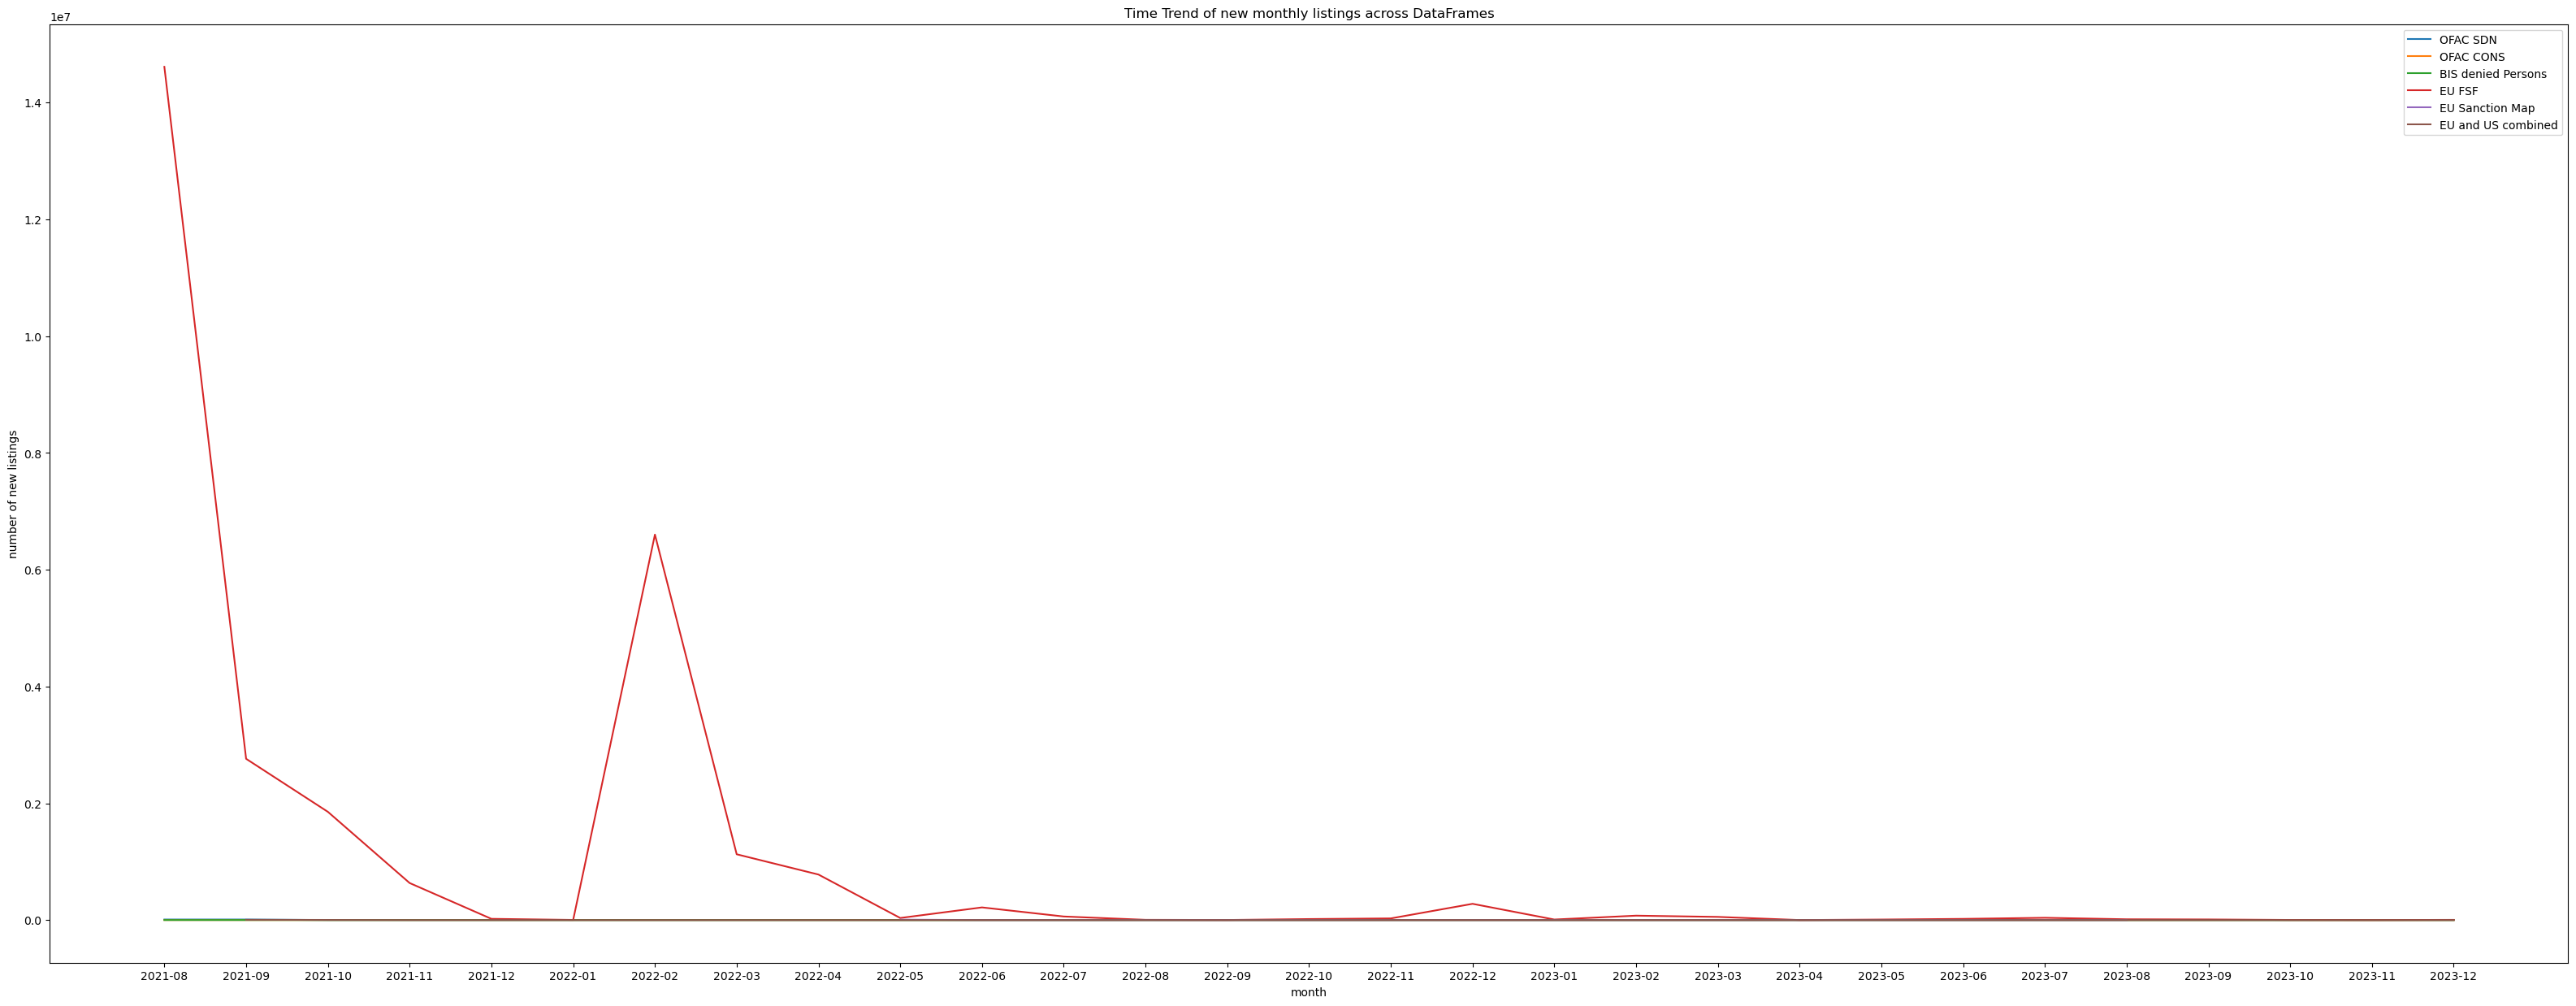

<Figure size 640x480 with 0 Axes>

In [3]:
# Assuming dfs is a list of your DataFrames containing the time trend data for one property
# Assuming property_name is the name of the property you want to compare

plt.figure(figsize=(40, 15))  # Adjust figure size as needed

# Define a color cycle for the plot
colors = plt.cm.tab10.colors  # You can choose any colormap you prefer
legend_labels = ['OFAC SDN','OFAC CONS','BIS denied Persons','EU FSF','EU Sanction Map','EU and US combined']  # List to store legend labels
dfs = [us,cons,bis,fsf,eu_map,combined]
# Plotting each DataFrame separately
for i, df in enumerate(dfs):
    # Assuming the index represents time
    x = df['month']
    # Assuming the column containing the property values is named property_name
    y = df['listing_month']
    
    # Plot the data with a different color for each DataFrame
    plt.plot(x, y, label=f'DataFrame {i+1}', color=colors[i % len(colors)])
 # Append legend label for this line
    legend_labels.append(f'DataFrame {i+1}')

# Add labels and legend
plt.xlabel('month')
plt.ylabel('number of new listings')
plt.title(f'Time Trend of new monthly listings across DataFrames')
plt.legend(legend_labels)

# Show plot
plt.show()
plt.savefig('timetrend_all.png')

In [11]:
#data_russ2=data[data['sanctions'].str.contains("UKR - 2022|UKR - 2023")==True]
data_russ2_eu=fsf[fsf['sanctions'].str.contains("UKR - 2022|UKR - 2023")==True]
data_russ2_eu = data_russ2_eu.sort_values(by=['month'])
data_russ2_us=us[us['sanctions'].str.contains("14024")==True]
data_russ2_us= data_russ2_us.sort_values(by=['month'])

In [12]:
data_russ2_eu

,Unnamed: 0.1,Unnamed: 0,id,schema,name,aliases,birth_date,countries,addresses,identifiers,...,listing_date,delisting_date,month,new_listing_count,listing_count,iso,country_0,year_id,month_id,listing_month
16313,16313,9299,eu-fsf-eu-7292-30,Person,Ivan Kvitka,Иван Иванович Квитка,1967-05-04,NaN,NaN,NaN,...,20220225,20220225.0,2022-02,1292,1292,SJM,NaN,2022,6,6602120
17028,17028,9472,eu-fsf-eu-7478-7,Person,Rifat Gabdulkhakovich SHAYHUTDINOV,Rifat Gabdulchakovitj SJAJCHUTDINOV;Рифат Габд...,1963-12-23,NaN,NaN,NaN,...,20220226,20220226.0,2022-02,1292,1292,SJM,NaN,2022,6,6602120
17027,17027,9472,eu-fsf-eu-7478-7,Person,Rifat Gabdulkhakovich SHAYHUTDINOV,Rifat Gabdulchakovitj SJAJCHUTDINOV;Рифат Габд...,1963-12-23,NaN,NaN,NaN,...,20220226,20220226.0,2022-02,1292,1292,NaN,NaN,2022,6,6602120
17026,17026,9472,eu-fsf-eu-7478-7,Person,Rifat Gabdulkhakovich SHAYHUTDINOV,Rifat Gabdulchakovitj SJAJCHUTDINOV;Рифат Габд...,1963-12-23,NaN,NaN,NaN,...,20220226,20220226.0,2022-02,1292,1292,MAC,NaN,2022,6,6602120
17025,17025,9472,eu-fsf-eu-7478-7,Person,Rifat Gabdulkhakovich SHAYHUTDINOV,Rifat Gabdulchakovitj SJAJCHUTDINOV;Рифат Габд...,1963-12-23,NaN,NaN,NaN,...,20220226,20220226.0,2022-02,1292,1292,HKG,NaN,2022,6,6602120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7062,7062,4999,Q120266691,Person,Andrej Jurjevitj LUSTENKO,Andrey Yurievich LUSTENKO;Андрей Юрьевич ЛУСТЕНКО,1975-06-16,NaN,NaN,NaN,...,20231115,NaN,2023-11,17,17,NaN,NaN,2023,26,374
7063,7063,4999,Q120266691,Person,Andrej Jurjevitj LUSTENKO,Andrey Yurievich LUSTENKO;Андрей Юрьевич ЛУСТЕНКО,1975-06-16,NaN,NaN,NaN,...,20231115,NaN,2023-11,17,17,SJM,NaN,2023,26,374
18930,18930,1018,NK-EjpSyWFh3RXn2hmv6PmCjN,Organization,"PJSC ""Motovilikhinskiye Zavody""",Motovilikhinskiye Zavody ÁRt.;Société par acti...,NaN,ru,"str. 1905, building 35, Perm, RUSSIAN FEDERATI...",1025901364708,...,20231201,20231201.0,2023-12,59,59,RUS,ru,2023,24,3304
19228,19228,3066,NK-bJThAbso99PAbqDzL62S5J,Organization,"PJSC ""Motovilikhinskiye Zavody""",Motovilikhinskiye Zavody ÁRt.;Société par acti...,NaN,ru,"str. 1905, building 35, Perm, RUSSIAN FEDERATI...",1025901364708,...,20231202,NaN,2023-12,59,59,RUS,ru,2023,24,3304


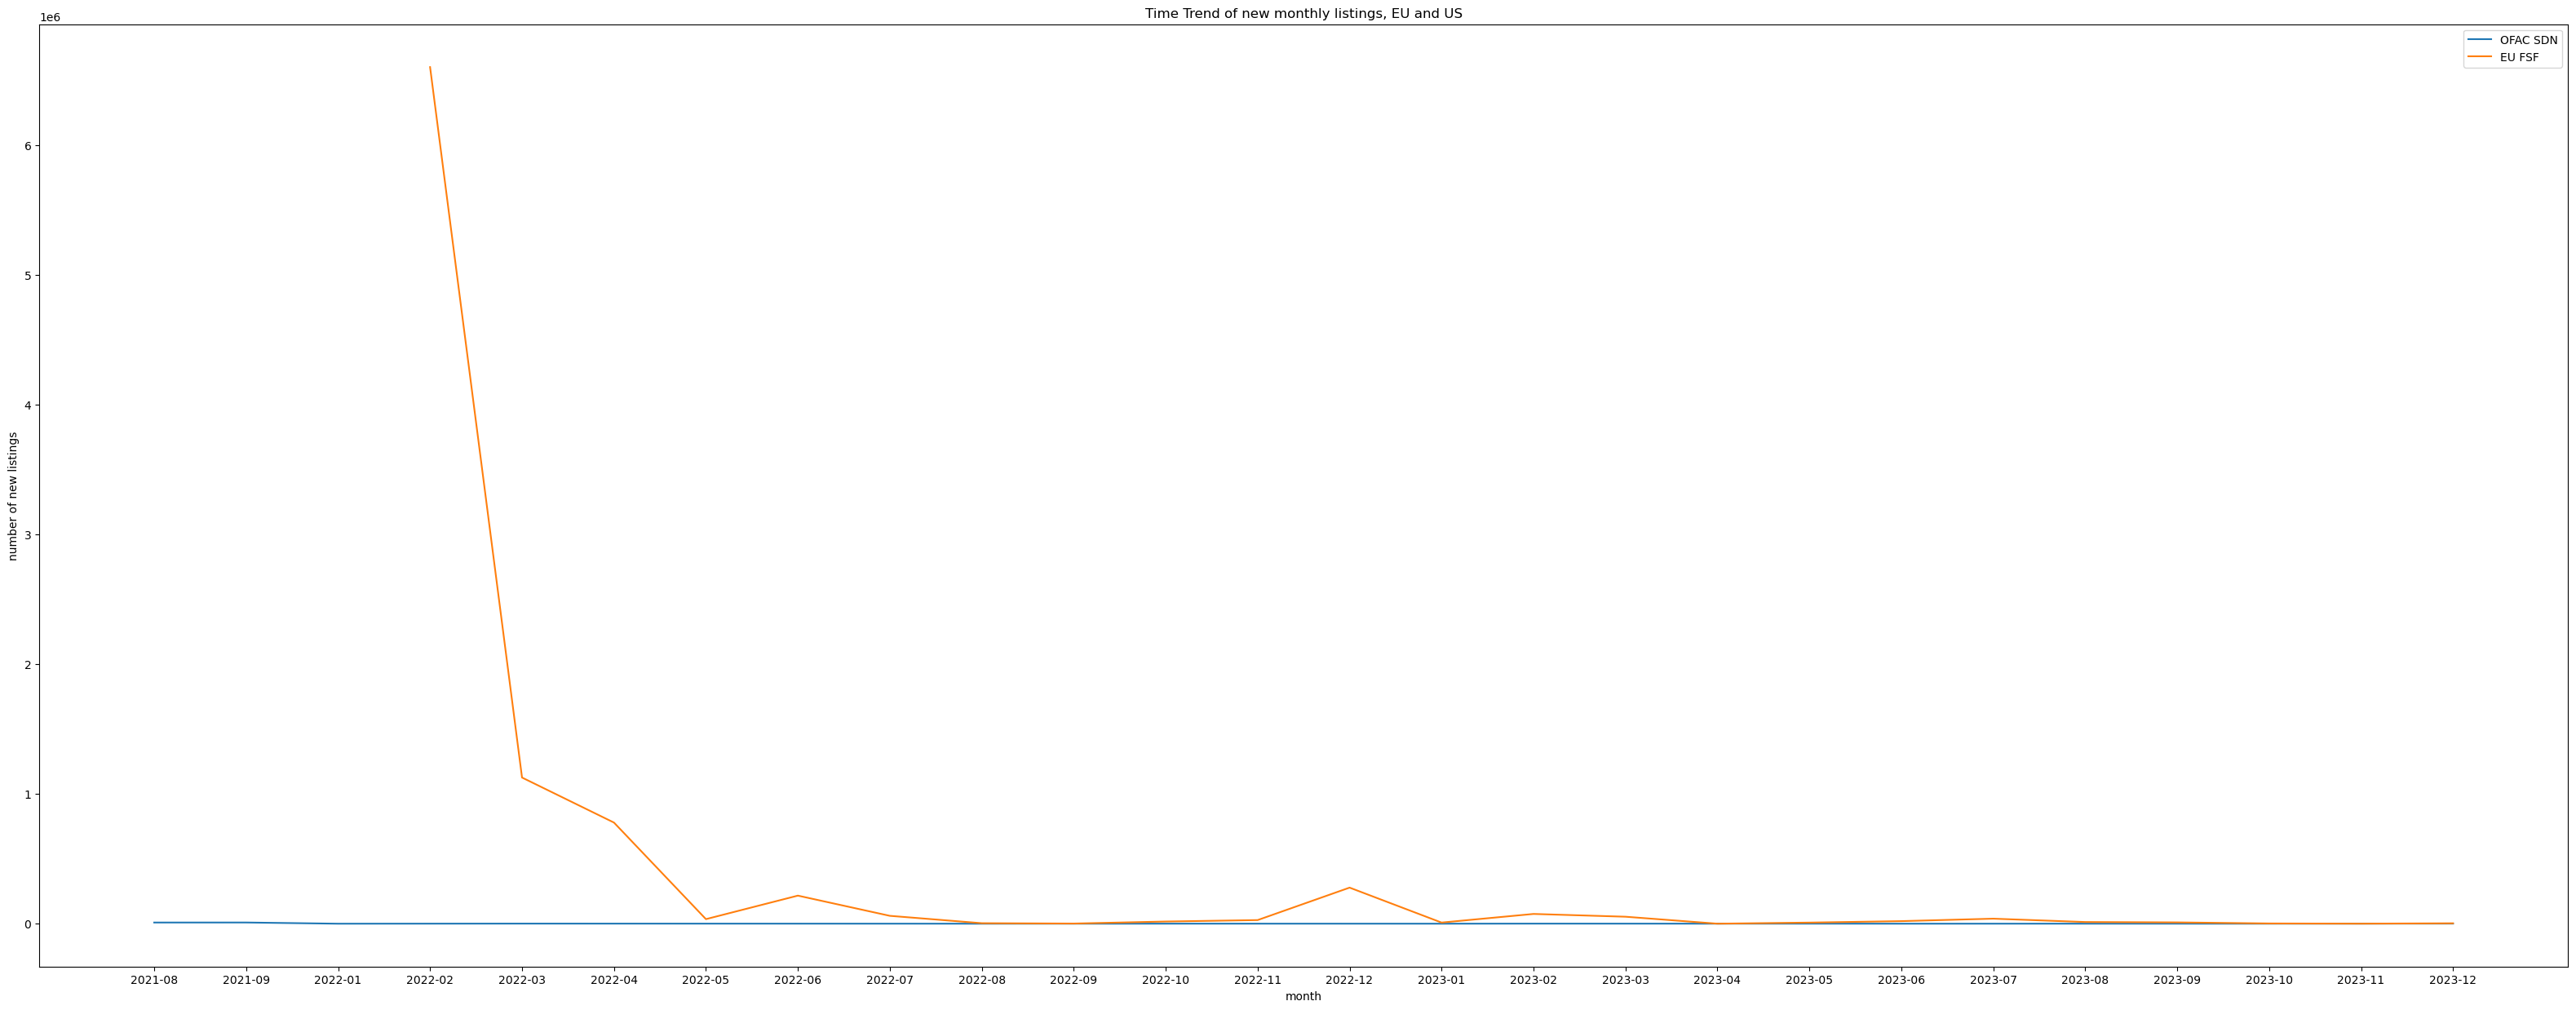

<Figure size 640x480 with 0 Axes>

In [13]:
#create a combined plot for russia
plt.figure(figsize=(40, 15))  # Adjust figure size as needed

# Define a color cycle for the plot
colors = plt.cm.tab10.colors  # You can choose any colormap you prefer
legend_labels = ['OFAC SDN','EU FSF']  # List to store legend labels
dfs = [data_russ2_us,data_russ2_eu]
# Plotting each DataFrame separately
for i, df in enumerate(dfs):
    # Assuming the index represents time
    x = df['month']
    # Assuming the column containing the property values is named property_name
    y = df['listing_month']
    
    # Plot the data with a different color for each DataFrame
    plt.plot(x, y, label=f'DataFrame {i+1}', color=colors[i % len(colors)])
 # Append legend label for this line
    legend_labels.append(f'DataFrame {i+1}')

# Add labels and legend
plt.xlabel('month')
plt.ylabel('number of new listings')
plt.title(f'Time Trend of new monthly listings, EU and US')
plt.legend(legend_labels)

# Show plot
plt.show()
plt.savefig('timetrend_sdn_fsf.png')

In [36]:
data = eu_map.copy()

In [37]:
#incoporate the terror IV
terror= pd.read_csv('IV\\data_gti.csv')
print(terror.columns)
terror=terror.sort_values(by=['year'])
print(terror)

Index(['year', 'iso', 'country_name', 'gti_rank', 'gti_score',
       'gti_incident_count', 'gti_fat_count', 'gti_injured_count',
       'gti_hostage_count'],
      dtype='object')
     year  iso       country_name  gti_rank  gti_score  gti_incident_count  \
0    2020  AFG        Afghanistan         1   9.056336                 643   
105  2020  NER              Niger        12   7.417721                  69   
106  2020  NGA            Nigeria         4   8.434954                 142   
107  2020  NIC          Nicaragua       105   0.000000                   0   
108  2020  NLD              Benin        73   1.900143                   0   
..    ...  ...                ...       ...        ...                 ...   
381  2022  GNB      Guinea-Bissau        93   0.000000                   0   
382  2022  GNQ  Equatorial Guinea        93   0.000000                   0   
383  2022  GRC             Greece        31   4.793059                  35   
385  2022  GUY             Guyana      

In [38]:
data=data.sort_values(by=['year_id'])

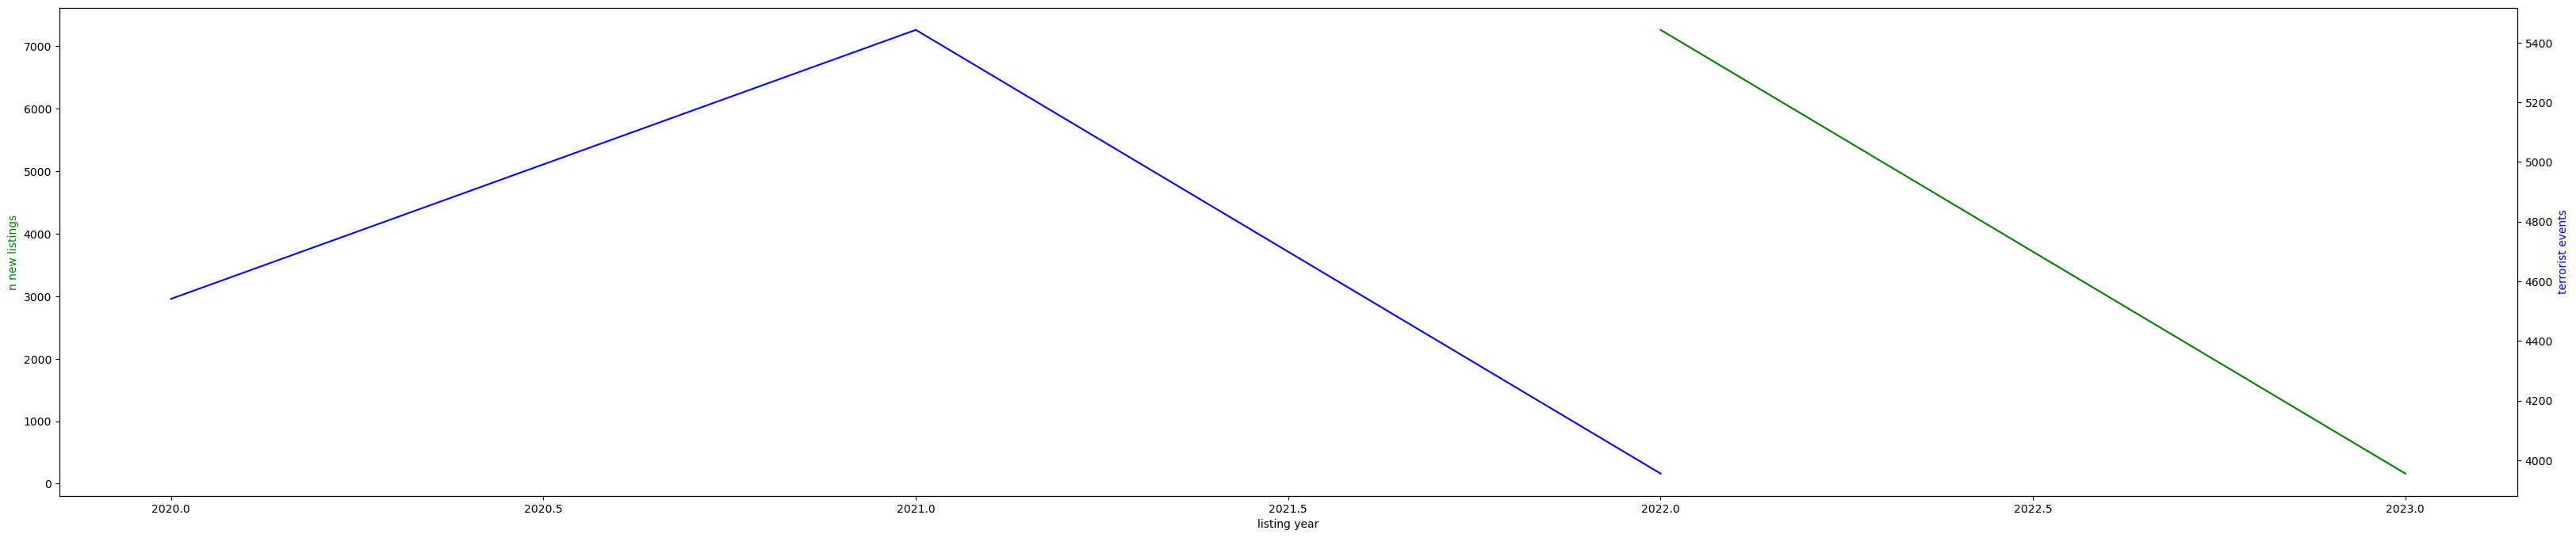

In [39]:
grouped_1 = data.groupby(['year_id']).agg({'new_listing_count': 'sum'})
grouped_2 = terror.groupby(['year']).agg({'gti_incident_count': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.year_id,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing year", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.year, grouped_2["gti_incident_count"],color="blue")
ax2.set_ylabel("terrorist events",color="blue",fontsize=10)
plt.savefig('timetrend_terror_sdn.png')
plt.show()

In [40]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
print('conflict')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(terror.dropna()['gti_incident_count'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(terror['gti_incident_count'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


conflict
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 827.9309870949469
P-value (ANOVA): 2.376051058810014e-116
